# Regularization methods 

In [4]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Data Preparation

In [2]:
# ƒê·ªçc file 'DWD.csv' b·∫±ng th∆∞ vi·ªán pandas
dwd = pd.read_table('DWD.csv', index_col=0, sep=',')

In [3]:
# In c√°c c·ªôt trong dataframe
dwd.columns

Index(['DWD_ID', 'STATION_NAME', 'FEDERAL_STATE', 'LAT', 'LON', 'ALTITUDE',
       'PERIOD', 'RECORD_LENGTH', 'MEAN_ANNUAL_AIR_TEMP',
       'MEAN_MONTHLY_MAX_TEMP', 'MEAN_MONTHLY_MIN_TEMP',
       'MEAN_ANNUAL_WIND_SPEED', 'MEAN_CLOUD_COVER', 'MEAN_ANNUAL_SUNSHINE',
       'MEAN_ANNUAL_RAINFALL', 'MAX_MONTHLY_WIND_SPEED', 'MAX_AIR_TEMP',
       'MAX_WIND_SPEED', 'MAX_RAINFALL', 'MIN_AIR_TEMP',
       'MEAN_RANGE_AIR_TEMP'],
      dtype='object')

In [6]:
# In th√¥ng tin c·ªßa dataframe (b·∫±ng 'info()')
dwd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 1058
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DWD_ID                  599 non-null    int64  
 1   STATION_NAME            599 non-null    object 
 2   FEDERAL_STATE           599 non-null    object 
 3   LAT                     599 non-null    float64
 4   LON                     599 non-null    float64
 5   ALTITUDE                599 non-null    float64
 6   PERIOD                  599 non-null    object 
 7   RECORD_LENGTH           599 non-null    int64  
 8   MEAN_ANNUAL_AIR_TEMP    598 non-null    float64
 9   MEAN_MONTHLY_MAX_TEMP   597 non-null    float64
 10  MEAN_MONTHLY_MIN_TEMP   595 non-null    float64
 11  MEAN_ANNUAL_WIND_SPEED  588 non-null    float64
 12  MEAN_CLOUD_COVER        588 non-null    float64
 13  MEAN_ANNUAL_SUNSHINE    406 non-null    float64
 14  MEAN_ANNUAL_RAINFALL    586 non-null    f

In [7]:
# Lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt trong vi·ªác d·ª± ƒëo√°n l∆∞·ª£ng m∆∞a trung b√¨nh h·∫±ng nƒÉm
df = dwd.drop(['DWD_ID','RECORD_LENGTH','STATION_NAME','FEDERAL_STATE','PERIOD'], axis=1).dropna()

# Hi·ªÉn th·ªã c√°c gi√° tr·ªã ƒë·∫ßu
df.head()

LAT      LON  ALTITUDE  MEAN_ANNUAL_AIR_TEMP  MEAN_MONTHLY_MAX_TEMP  \
ID                                                                            
1   50.7827   6.0941     202.0                   9.8                   13.6   
2   52.9335   8.2370      44.0                   9.2                   13.2   
24  53.0316  13.9907      54.0                   8.4                   12.9   
29  49.2964  10.5751     413.0                   7.5                   12.2   
31  54.6792  13.4343      42.0                   8.2                   10.6   

    MEAN_MONTHLY_MIN_TEMP  MEAN_ANNUAL_WIND_SPEED  MEAN_CLOUD_COVER  \
ID                                                                    
1                     6.3                     3.0              67.0   
2                     5.4                     2.0              67.0   
24                    4.3                     2.0              68.0   
29                    3.3                     2.0              65.0   
31                    6.0                     4.0              66.0   

    MEAN_ANNUAL_SUNSHINE  MEAN_ANNUAL_RAINFALL  MAX_MONTHLY_WIND_SPEED  \
ID                                                                       
1                 1531.0                 820.0                     3.0   
2                 1459.0                 759.0                     3.0   
24                1695.0                 531.0                     3.0   
29                1657.0                 681.0                     2.0   
31                1840.0                 543.0                     5.0   

    MAX_AIR_TEMP  MAX_WIND_SPEED  MAX_RAINFALL  MIN_AIR_TEMP  \
ID                                                             
1           32.3            30.2          36.0         -10.9   
2           32.4            29.9          32.0         -12.6   
24          33.0            28.8          37.0         -16.1   
29          31.4            22.8          36.0         -17.3   
31          26.8            35.5          33.0          -9.4   

    MEAN_RANGE_AIR_TEMP  
ID                       
1                   7.3  
2                   7.8  
24                  8.5  
29                  9.0  
31                  4.6

In [8]:
# T·∫°o ra m·ªôt DataFrame m·ªõi X b·∫±ng c√°ch lo·∫°i b·ªè c·ªôt 'MEAN_ANNUAL_RAINFALL' t·ª´ DataFrame g·ªëc df
X = df.drop('MEAN_ANNUAL_RAINFALL', axis=1)

# T·∫°o ra m·ªôt Series m·ªõi y b·∫±ng c√°ch ch·ªçn c·ªôt 'MEAN_ANNUAL_RAINFALL' l√† bi·∫øn m·ª•c ti√™u c·∫ßn d·ª± ƒëo√°n.
y = df['MEAN_ANNUAL_RAINFALL']

# Kh·ªüi t·∫°o ƒë·ªëi t∆∞·ª£ng scaler t·ª´ l·ªõp StandardScaler() trong th∆∞ vi·ªán sklearn.preprocessing. 
scaler =  StandardScaler()

# Chia d·ªØ li·ªáu th√†nh hai t·∫≠p: T·∫≠p hu·∫•n luy·ªán (X_train, y_train) v√† T·∫≠p ki·ªÉm tra (X_test, y_test). 
# ƒê·∫∑t random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chu·∫©n h√≥a d·ªØ li·ªáu hu·∫•n luy·ªán b·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p fit_transform() t·ª´ ƒë·ªëi t∆∞·ª£ng scaler ƒë√£ ƒë∆∞·ª£c kh·ªüi t·∫°o tr∆∞·ªõc ƒë√≥
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# ƒê·ªçc d·ªØ li·ªáu t·ª´ file feather 'rmses.feather'. 
# Ch·ªâ s·ªë c·ªßa DataFrame ƒë∆∞·ª£c thi·∫øt l·∫≠p l√† c·ªôt 'index'.
rmses = pd.read_feather('rmses.feather').set_index('index')
rmses

name  train_RMSE   test_RMSE
index                                              
0            baseline model  243.882152  180.877011
0          simple alt model  154.992815  138.854544
0        max rainfall model  119.953630  117.437897
0      multi alt rain model  118.095746  113.746363
4             forward model   87.392377  117.884639
5            backward model   87.236023  118.367974
6         mlxtend SFS model   91.976905   91.232370

## Ridge regression 

T√≠nh to√°n h·ªá s·ªë cho $\alpha \in \left[10^{-1}, 10^5\right]$ b·∫±ng ph∆∞∆°ng ph√°p ridge regression v√† v·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£.

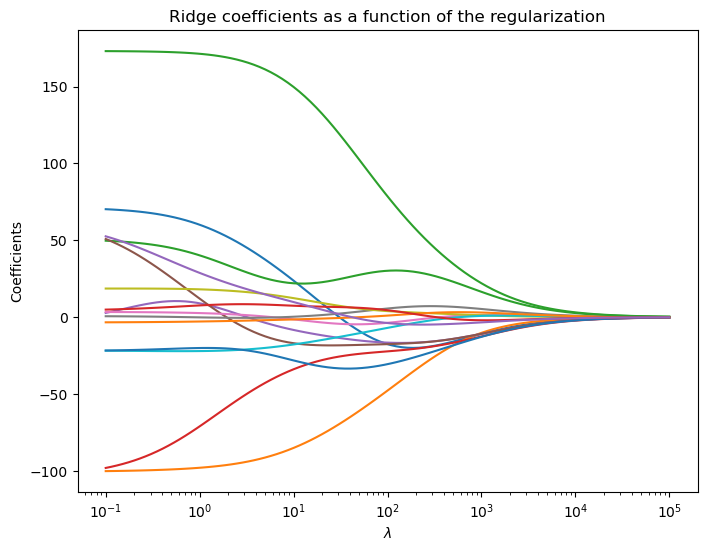

In [18]:
n_alphas = 100
alphas = np.logspace(-1, 5, n_alphas)

coefs = [linear_model.Ridge(alpha=a).fit(X_train, y_train).coef_ for a in alphas]

plt.figure(figsize=(8, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel("$\lambda$")
plt.ylabel("Coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.show()


Xem x√©t s·ª± kh√°c bi·ªát c·ªßa h·ªá s·ªë ƒë·ªëi v·ªõi c√°c h·ªìi quy tuy·∫øn t√≠nh ƒë∆°n gi·∫£n cho t·ª´ng tham s·ªë. ƒê·ªÉ ƒë·∫°t ƒë∆∞·ª£c m·ª•c ƒë√≠ch n√†y, ch√∫ng ta s·∫Ω t√≠nh to√°n c√°c h·ªá s·ªë h·ªìi quy tuy·∫øn t√≠nh ƒë∆°n gi·∫£n `reg_coeff` v√† t√≠nh sai s·ªë b√¨nh ph∆∞∆°ng trung b√¨nh v√† v·∫Ω ƒë·ªì th·ªã.

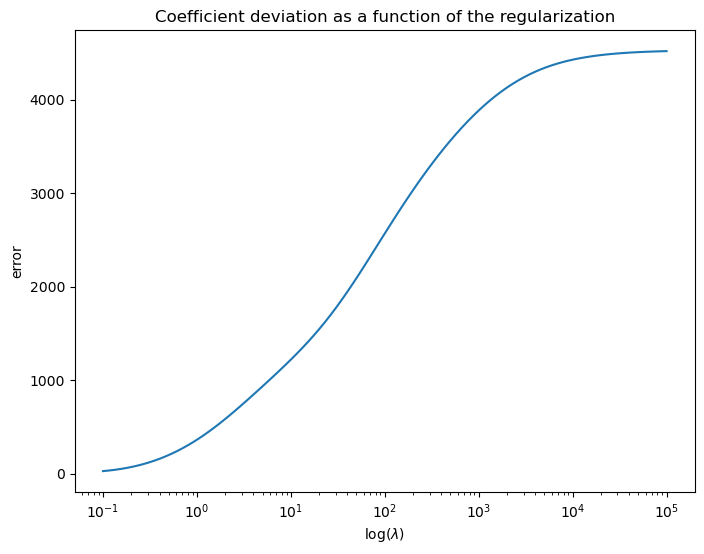

In [19]:
reg_coeff = linear_model.LinearRegression().fit(X_train, y_train)

errors = [mean_squared_error(linear_model.Ridge(alpha=a).fit(X_train, y_train).coef_, reg_coeff.coef_) for a in alphas]

plt.figure(figsize=(8, 6))
plt.plot(alphas, errors)
plt.xscale('log')
plt.xlabel("log($\lambda$)")
plt.ylabel("error")
plt.title("Coefficient deviation as a function of the regularization")
plt.show()
 

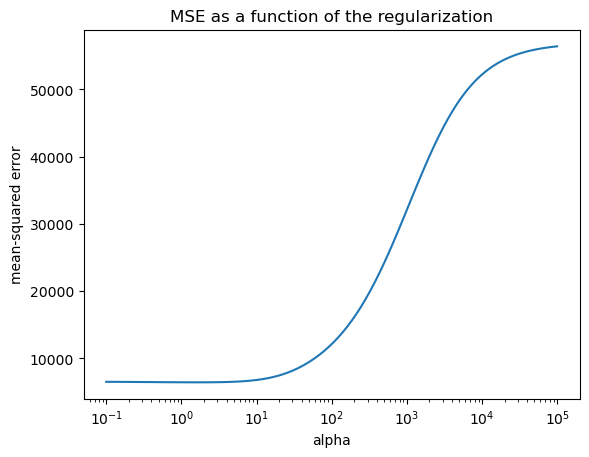

In [22]:
# S·ª≠ d·ª•ng RidgeCV t·ª´ th∆∞ vi·ªán linear_model ƒë·ªÉ th·ª±c hi·ªán ridge regression 
# v·ªõi c√°c gi√° tr·ªã alpha ƒë√£ ƒë∆∞·ª£c x√°c ƒë·ªãnh tr∆∞·ªõc trong m·∫£ng alphas. 
# ƒê·∫∑t store_cv_values=True ƒë·ªÉ l∆∞u tr·ªØ gi√° tr·ªã cross-validated mean squared error (MSE).
reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)

# S·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c fit() ƒë·ªÉ ƒë√†o t·∫°o m√¥ h√¨nh ridge tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán X_train v√† y_train.
reg = reg.fit(X_train, y_train)

# L·∫•y tr·ª•c hi·ªán t·∫°i b·∫±ng plt.gca()
ax = plt.gca()

# V·∫Ω bi·ªÉu ƒë·ªì c·ªßa gi√° tr·ªã MSE trung b√¨nh theo ùõº t·ª´ c√°c gi√° tr·ªã cross-validated MSE ƒë√£ l∆∞u tr·ªØ trong reg.cv_values_. 
ax.plot(alphas, np.mean(reg.cv_values_, axis=0))
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("mean-squared error")
plt.title("MSE as a function of the regularization")
plt.axis("tight")
plt.show()

In [23]:
# In ra m√†n h√¨nh c√°c th√¥ng tin sau: Best score, Estimated regularization parameter alpha, Training score, Test score
print("Best score:", reg.best_score_)
print("Estimated regularization parameter alpha:", reg.alpha_)
print("Training score:", reg.score(X_train, y_train))
print("Test score:", reg.score(X_test, y_test))

Best score: -6440.0361349914965
Estimated regularization parameter alpha: 1.6297508346206444
Training score: 0.9081942915442122
Test score: 0.8625788494568934


In [24]:
# D·ª± ƒëo√°n cho t·∫≠p hu·∫•n luy·ªán
m_ridge_cv_pred_train = reg.predict(X_train)

# T√≠nh RMSE tr√™n t·∫≠p hu·∫•n luy·ªán
rmse_train = mean_squared_error(m_ridge_cv_pred_train, y_train, squared=False)
print('RMSE on training set:', rmse_train)

RMSE on training set: 71.84011342174607


In [25]:
# D·ª± ƒëo√°n cho t·∫≠p ki·ªÉm tra
m_ridge_cv_pred_test = reg.predict(X_test)

# T√≠nh RMSE tr√™n t·∫≠p ki·ªÉm tra
rmse_test = mean_squared_error(m_ridge_cv_pred_test, y_test, squared=False)
print('RMSE on test set:', rmse_test)

RMSE on test set: 77.40882425615033


In [16]:
# Th√™m m·ªôt h√†ng m·ªõi v√†o DataFrame rmses v·ªõi c√°c gi√° tr·ªã 'Ridge regression', rmse_train v√† rmse_test t∆∞∆°ng ·ª©ng.
rmses.loc[len(rmses)] = ['Ridge regresion', rmse_train, rmse_test]
rmses

name  train_RMSE   test_RMSE
index                                              
0            baseline model  243.882152  180.877011
0          simple alt model  154.992815  138.854544
0        max rainfall model  119.953630  117.437897
0      multi alt rain model  118.095746  113.746363
4             forward model   87.392377  117.884639
5            backward model   87.236023  118.367974
6         mlxtend SFS model   91.976905   91.232370
7           Ridge regresion   77.408824   71.840113

## Final result

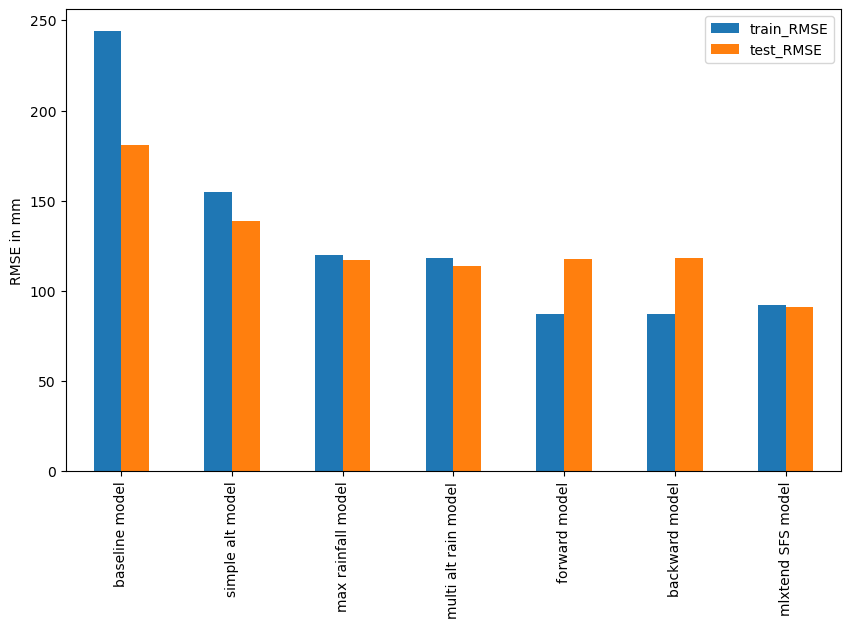

In [26]:
# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh RMSE gi·ªØa c√°c models hu·∫•n luy·ªán 
_, ax = plt.subplots(figsize=(10,6))
rmses.plot(kind="bar", x="name", ax=ax)
ax.set_xlabel("")
ax.set_ylabel("RMSE in mm")
plt.show()